In [145]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [146]:
import numpy as np
import pandas as pd

In [147]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [148]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,desc

In [149]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [150]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [151]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [152]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [153]:
# Create our session (link) from Python to the DB
session = Session(engine)
#engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
MEASURE = Base.classes.measurement    
#engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 10').fetchall()
data = session.query(MEASURE.date,MEASURE.prcp).\
filter(func.strftime("%Y", MEASURE.date) >= "2016").\
filter(func.strftime("%Y", MEASURE.date) < "2018").\
group_by(MEASURE.date).\
order_by(MEASURE.date).\
all()
df = pd.DataFrame(data, columns=['date', 'pcpt']).set_index('date')
df.head()
#print(data)
#data
#SELECT column1, column2, ...FROM table_name ORDER BY column1, column2, ... DSC    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,pcpt
date,
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,0.0


# Exploratory Climate Analysis

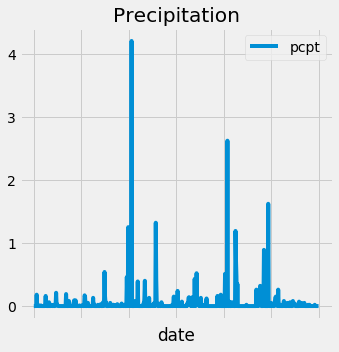

In [154]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
df.plot(kind='line', title ="Precipitation", figsize=(5, 5), legend=True)

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [155]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,pcpt
count,599.000000
mean,0.047496
std,0.242369
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,4.200000


In [156]:
# Design a query to show how many stations are available in this dataset?
session.query(MEASURE.station).distinct().count()

9

In [157]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(MEASURE.station,func.count(MEASURE.prcp)).\
group_by(MEASURE.station).order_by(desc(func.count(MEASURE.prcp))).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [158]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

dataTemp = session.query(func.min(MEASURE.tobs),func.max(MEASURE.tobs)).\
            filter(MEASURE.station=='USC00519281').all()

dataTemp

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(54.0, 85.0)]

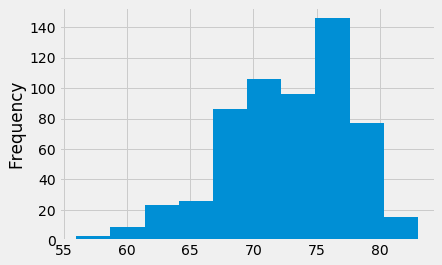

In [159]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
dataTemp = session.query(MEASURE.date,MEASURE.tobs).\
filter(func.strftime("%Y", MEASURE.date) >= "2016").\
filter(func.strftime("%Y", MEASURE.date) < "2018").\
filter(MEASURE.station=='USC00519281').\
group_by(MEASURE.date).\
order_by(MEASURE.date).\
all()
dfTemp = pd.DataFrame(dataTemp, columns=['date', 'tobs']).set_index('date')
dfTemp.head()
#dfTemp.plot(kind='line', title ="Temperature", figsize=(20, 10))

dfTemp['tobs'].plot.hist()

In [160]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [161]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
import datetime as dt

trip_arrive = dt.date(2017, 4, 1)
trip_leave = dt.date(2017, 4, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = calc_temps((trip_arrive-last_year), (trip_leave-last_year))
print(temp_avg_lst_year)

[(65.0, 73.41052631578947, 79.0)]


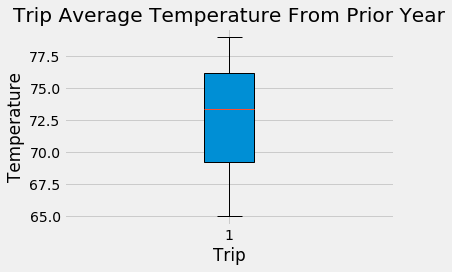

In [162]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = range(len(temp_avg_lst_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

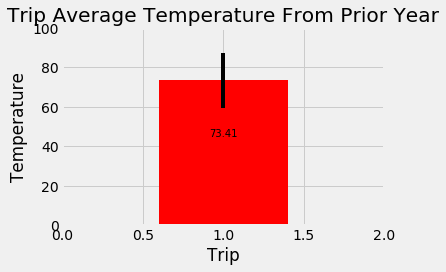

In [163]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'red', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
